In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 7508889954430416281, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 8321259316751951135
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 11661463122409091848
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15701463552
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 10991383154782511502
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
!cat /proc/meminfo
#the gpu info

MemTotal:       13333556 kB
MemFree:         9151536 kB
MemAvailable:   11856352 kB
Buffers:           75296 kB
Cached:          2747464 kB
SwapCached:            0 kB
Active:          1226628 kB
Inactive:        2530572 kB
Active(anon):     867780 kB
Inactive(anon):     8520 kB
Active(file):     358848 kB
Inactive(file):  2522052 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              1584 kB
Writeback:             0 kB
AnonPages:        934576 kB
Mapped:           688708 kB
Shmem:              9140 kB
Slab:             176252 kB
SReclaimable:     129612 kB
SUnreclaim:        46640 kB
KernelStack:        4432 kB
PageTables:         9352 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6666776 kB
Committed_AS:    3463992 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
Percpu:              920 kB
AnonHugePages:   

In [ ]:
data_path = "/content/drive/My\ Drive/Colab\ Notebooks/Experiments/CASIA2/casia2_ela_zip.zip"

In [ ]:
!cp $data_path .

In [ ]:
!unzip casia2_ela_zip.zip -d data

Streaming output truncated to the last 5000 lines.
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00045_arc00046_10084.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00045_arc00071_10087.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00046_arc00045_10083.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00054_cha00085_11922.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00071_arc00045_10085.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00073_arc00072_10267.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_arc00088_arc00064_10394.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00012_art00013_11812.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00014_art00013_11836.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00058_art00049_10529.tif  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00067_ani00093_11801.jpg  
  inflating: data/casia2_ela/tamp/Tp_D_CRN_M_N_art00067_ani00095_11803.jpg  
  inflating: data/casia2_

In [ ]:
!pwd


/content


In [ ]:
!ls

casia2_ela_zip.zip  data  drive  sample_data


In [ ]:
data_path = "data/casia2_ela/"

In [ ]:
tf.__version__


'2.2.0'

In [ ]:
#nor_es
import os
import io
import numpy as np
import tensorflow as tf
from keras.preprocessing import image
import pandas as pd
from PIL import Image, ImageChops, ImageEnhance
import os
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.models import Model, Sequential 
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.optimizers import RMSprop, adam
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, LearningRateScheduler
from keras.constraints import Constraint



Using TensorFlow backend.


In [ ]:
def jpeg_compression(img: Image.Image, quality: int=90) -> Image.Image:
    if img.mode != 'RGB':
        img = img.convert('RGB')
    buffer = io.BytesIO()
    img.save(buffer, format='JPEG', quality=quality)
    im_data = buffer.getvalue()
    img = Image.open(io.BytesIO(im_data))
    buffer.close()
    return img


In [ ]:
def convert_to_ela(img):
    im = img.convert('RGB')
    resaved_im = jpeg_compression(im)
    
    ela_im = ImageChops.difference(im, resaved_im)
    
    extrema = ela_im.getextrema()
    max_diff = max([ex[1] for ex in extrema])
    if max_diff == 0:
        max_diff = 1
    scale = 255.0 / max_diff
    
    ela_im = ImageEnhance.Brightness(ela_im).enhance(scale)
    
    return ela_im

In [ ]:
def scheduler(epoch):
  if epoch<5:
    return 0.001;
  else:
    return float(0.001*tf.math.exp(0.1*(10-epoch)))

lr_schedule = LearningRateScheduler(scheduler)

In [ ]:
#Defining Parameters
batch_size = 32
nb_epochs = 50
img_width = 256
img_height = 256
CONV_RES_SIZE = 5
nb_customfilters = 32
size_custom_filter = 5

In [ ]:
class CustomConstraint9 (Constraint):
  def __call__(self, filter):
    conditions = np.ones((5, 5, 3, 32))
    print(conditions.shape)

    for i in range(32):
      for j in range(3):
        conditions[2, 2, j, i] = 0

    conditions = ((conditions > 0).tolist())

    update1 = tf.zeros(shape=[5, 5, 3, 32], dtype=tf.float32)
    
    temp1 = tf.where(conditions, filter, update1)
    
    sum = tf.math.reduce_sum(temp1, axis=[0, 1])
    
    temp2 = tf.divide(temp1, sum)
    
    update2 = tf.ones(shape=[5, 5, 3, 32], dtype=tf.float32)
    
    update2 = tf.math.negative(update2)
    
    temp3 = tf.where(conditions, temp2, update2)
    
    return temp3




In [ ]:
class CustomConstraint9 (Constraint):
  def __call__(self, filter):
    conditions = np.ones((5, 5, 3, 32))
    print(conditions.shape)

    for i in range(32):
      for j in range(3):
        conditions[2, 2, j, i] = 0


    conditions = ((conditions > 0).tolist())

    update1 = tf.zeros(shape=[5, 5, 3, 32], dtype=tf.float32)


    temp1 = tf.where(conditions, filter, update1)


    sum = tf.math.reduce_sum(temp1, axis=[0, 1])


    temp2 = tf.divide(temp1, sum)



    update2 = tf.ones(shape=[5, 5, 3, 32], dtype=tf.float32)
    update2 = tf.math.negative(update2)


    temp3 = tf.where(conditions, temp2, update2)

    return temp3




In [ ]:
model = Sequential()
model.add(Conv2D(filters=nb_customfilters, kernel_size = (size_custom_filter,size_custom_filter), padding = 'valid',
                 activation ='relu', kernel_constraint= CustomConstraint9(), input_shape=(img_height, img_width, 3)))
model.add(Conv2D(filters = 64, kernel_size = (7,7), strides = (2, 2), padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(filters = 48, kernel_size = (5,5), strides = (1, 1), padding = 'valid',activation ='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Flatten())
model.add(Dense(4096, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(4096, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(2, activation = "softmax"))
model.summary()


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 252, 252, 32)      2432      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 123, 123, 64)      100416    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 41, 41, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 37, 37, 48)        76848     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 48)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6912)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 4096)             

In [ ]:
optimizer = RMSprop(learning_rate = 1e-06, decay=0.0005)


In [ ]:
model.compile(optimizer = optimizer, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_accuracy',
                              min_delta=0,
                              patience=2,
                              verbose=0, mode='auto')

In [ ]:
#weights = "saved_weights/test1.hdf5"
#model.load_weights(weights)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,  validation_split=0.2)

In [ ]:
!pwd

/content


In [ ]:
!ls

casia2_ela_zip.zip  data  drive  sample_data


In [ ]:
train_data = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

Found 10092 images belonging to 2 classes.


In [ ]:
validation_data = train_datagen.flow_from_directory(
    data_path, # same directory as training data
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

Found 2522 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
            train_data,
            steps_per_epoch = train_data.samples // batch_size,
            validation_data = validation_data, 
            validation_steps = validation_data.samples // batch_size,
            epochs = nb_epochs)
            #callbacks = [lr_schedule])


(5, 5, 3, 32)
Epoch 1/50
315/315 [==============================] - 38s 122ms/step - loss: 0.8241 - accuracy: 0.5523 - val_loss: 0.4696 - val_accuracy: 0.5942
Epoch 2/50
315/315 [==============================] - 38s 121ms/step - loss: 0.7540 - accuracy: 0.5752 - val_loss: 0.6338 - val_accuracy: 0.5980
Epoch 3/50
315/315 [==============================] - 38s 119ms/step - loss: 0.7035 - accuracy: 0.5887 - val_loss: 0.5783 - val_accuracy: 0.5900
Epoch 4/50
315/315 [==============================] - 37s 119ms/step - loss: 0.6650 - accuracy: 0.6073 - val_loss: 0.5645 - val_accuracy: 0.5956
Epoch 5/50
315/315 [==============================] - 37s 119ms/step - loss: 0.6463 - accuracy: 0.6129 - val_loss: 0.5999 - val_accuracy: 0.6028
Epoch 6/50
315/315 [==============================] - 37s 118ms/step - loss: 0.6080 - accuracy: 0.6400 - val_loss: 0.6594 - val_accuracy: 0.6104
Epoch 7/50
315/315 [==============================] - 37s 118ms/step - loss: 0.5817 - accuracy: 0.6529 - val_loss: 0

In [ ]:
print("done")

done


In [ ]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


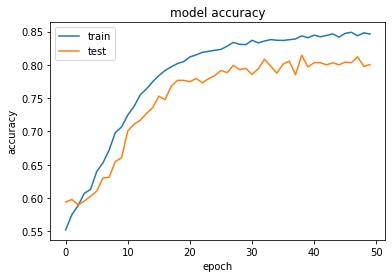

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



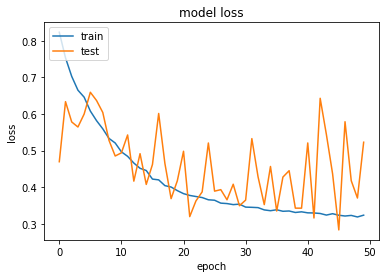

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



In [ ]:
#Confusion Matrix and Classification Report
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
Y_pred = model.predict_generator(validation_data, validation_data.samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(validation_data.classes, y_pred))


print('Classification Report')
target_names = ['Aut', 'Tamp']
print(classification_report(validation_data.classes, y_pred, target_names=target_names))

Confusion Matrix
[[982 516]
 [704 320]]
Classification Report
              precision    recall  f1-score   support

         Aut       0.58      0.66      0.62      1498
        Tamp       0.38      0.31      0.34      1024

    accuracy                           0.52      2522
   macro avg       0.48      0.48      0.48      2522
weighted avg       0.50      0.52      0.51      2522



In [ ]:
x, y = validation_data.class_indices
print(x, y)

aut tamp


In [ ]:
#!cp -r path/to/google_drive_data_dir/ path/to/colab_data_dir

In [ ]:
#path of any test image
predict_path = "predict_images/i1_cm1.jpg"



In [ ]:
from IPython.display import Image as imgloader
display(imgloader(filename = predict_path, width = img_width, height=img_height))


In [ ]:
test_img = image.load_img(predict_path, target_size = (img_width, img_height))


test_img = convert_to_ela(test_img)



temp = test_img
test_image = image.img_to_array(test_img)
test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image)
temp


In [ ]:
train_data.class_indices

In [ ]:
result

In [ ]:
tamp = result[0][1]
if(tamp==1):
    print("Fake image, some tampering detected !")
else:
    print("The image looks authentic !")